<a href="https://colab.research.google.com/github/bcury/ComputerVision-OCR/blob/main/Classifica%C3%A7%C3%A3o_Sentimentos_NLTK_spiCy_LinguagemNatural_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classificação de sentimentos**

In [1]:
pip install spicy --upgrade

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spicy
import random
import string

vou baixar a versao do  spacy do modelo em  portugues desta vez

In [3]:
!python -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=2629f400dc13c3487f966d7d81241502c9d82e0a687d50267d9740a93af37338
  Stored in directory: /tmp/pip-ephem-wheel-cache-rw_f01yl/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


**Carregar os textos**

In [4]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')

In [5]:
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


In [6]:
base_dados.shape

(196, 2)

In [7]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [8]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


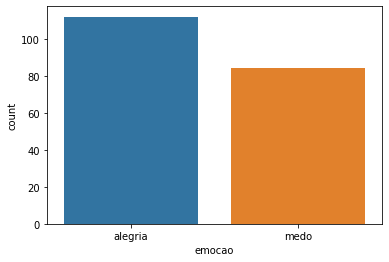

In [11]:
sns.countplot(base_dados['emocao'], label = 'contagem');

Portanto vemos mais registros de ALEGRIA do que de MEDO

**Função pra Pré-Processamento dos textos**

In [12]:
pontuações = string.punctuation
pontuações

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [15]:
stop_words = STOP_WORDS
print(stop_words)

{'tens', 'contudo', 'tipo', 'partir', 'duas', 'mês', 'vosso', 'somente', 'segundo', 'aquela', 'veja', 'cujo', 'podem', 'outras', 'qualquer', 'uns', 'possivelmente', 'vindo', 'põe', 'todo', 'próprio', 'sistema', 'quarto', 'maioria', 'estive', 'terceira', 'algumas', 'enquanto', 'estado', 'estar', 'ou', 'teve', 'mil', 'vez', 'tu', 'tarde', 'local', 'umas', 'tal', 'mas', 'com', 'outros', 'nosso', 'fez', 'sim', 'podia', 'quê', 'até', 'são', 'da', 'dezanove', 'te', 'aquilo', 'acerca', 'ora', 'inclusive', 'vossa', 'nossos', 'estivestes', 'pegar', 'custa', 'através', 'longe', 'primeira', 'ele', 'ir', 'obrigada', 'nessa', 'último', 'pouca', 'diz', 'isto', 'quero', 'vinda', 'grande', 'tendes', 'sexto', 'esta', 'lhe', 'aquele', 'apoio', 'ambas', 'não', 'porquê', 'número', 'todos', 'cuja', 'você', 'ao', 'vós', 'poderá', 'minha', 'ontem', 'nas', 'apenas', 'tudo', 'estiveste', 'oito', 'quinze', 'fará', 'nuns', 'irá', 'menos', 'bastante', 'novo', 'à', 'também', 'fazia', 'assim', 'ambos', 'usa', 'pode

In [16]:
len(stop_words)

413

In [20]:
import spacy
pln = spacy.load('pt')
pln

In [59]:
def preprocessamento(texto):
  texto = texto.lower() #passar pra minusculo antes de usar o lemma_, se nao ele faz leitura errada
  documento = pln(texto)

  Lista = []
  for token in documento:
    #Lista.append(token.text)
    Lista.append(token.lemma_)

  Lista = [palavra for palavra in Lista if palavra not in stop_words and palavra not in pontuações]
  Lista = ' '.join(str(elemento) for elemento in Lista if not elemento.isdigit()) #formato de lista pra formato de texto

  return Lista



In [60]:
teste = preprocessamento('Python 1 2 3 e Computação Visual, é muito top')

In [61]:
teste

'python e computação visual top'

entao conseguimos trasnformar em texto e também eliminar o 1 2 3, alem do que ja tinhamos tirado com as stop_words

**Pré-Processamento da base de dados**

In [62]:
#Limpeza

base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [64]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

Apply é função do pandas que ja faz a transformação do pre processamento dos textos um a um, sem prcisar de mais nada

In [66]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


agora já temos os textos tudo certinho, com todo o tratamento dos dados, com as palavras principais somente, graças ao Pandas e sua função Apply

In [70]:
#Tratamento da classe

#classe: medo e alegria

ex_base_dados = [['este trabalho é agradável', {'ALEGRIA':True, 'MEDO':False}],['este lugar continua assustador', {'ALEGRIA':False, 'MEDO':True}]]

In [71]:
ex_base_dados

[['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['este lugar continua assustador', {'ALEGRIA': False, 'MEDO': True}]]

In [72]:
type(ex_base_dados)

list

In [73]:
ex_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [75]:
ex_base_dados[0][0]

'este trabalho é agradável'

In [74]:
ex_base_dados[1]

['este lugar continua assustador', {'ALEGRIA': False, 'MEDO': True}]

In [77]:
ex_base_dados[1][0]

'este lugar continua assustador'

In [78]:
ex_base_dados[1][1]

{'ALEGRIA': False, 'MEDO': True}

In [79]:
ex_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [80]:
type(ex_base_dados[0][1])

dict

In [88]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']): #zip pois precisou, ja que retornou muitos valores como erro no output
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA':True, 'MEDO':False})
  elif  emocao == 'medo':
    dic = ({'ALEGRIA':False, 'MEDO':True})

  base_dados_final.append([texto, dic.copy()])

In [89]:
len(base_dados_final)

196

In [90]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [91]:
base_dados_final[0][0]

'trabalhar agradável'

In [93]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [94]:
type(base_dados_final[0][1])

dict

In [95]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

**Criação do Classificador**

In [98]:
modelo = spacy.blank('pt')
categ = modelo.create_pipe('textcat')
categ.add_label('ALEGRIA')
categ.add_label('MEDO')
modelo.add_pipe(categ)
historico = []


In [104]:
#Treinamento

modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  perdas ={}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=perdas)  #ajustes de pesos
  if epoca % 100 == 0:
    print(perdas)
    historico.append(perdas)

{'textcat': 0.006454392161685973}
{'textcat': 1.0460885224716776e-07}
{'textcat': 3.309063312251226e-08}
{'textcat': 1.5476994685847956e-08}
{'textcat': 8.123110684099544e-09}
{'textcat': 5.677957104488485e-09}
{'textcat': 3.999253872510877e-09}
{'textcat': 3.0658914573766793e-09}
{'textcat': 2.8018091180470606e-09}
{'textcat': 2.458930739579479e-09}


In [105]:
historico_perdas = []
for i in historico:
  historico_perdas.append(i.get('textcat'))

In [106]:
historico_perdas = np.array(historico_perdas)
historico_perdas

array([6.45439216e-03, 1.04608852e-07, 3.30906331e-08, 1.54769947e-08,
       8.12311068e-09, 5.67795710e-09, 3.99925387e-09, 3.06589146e-09,
       2.80180912e-09, 2.45893074e-09])

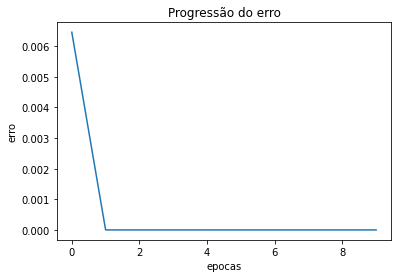

In [107]:
plt.plot(historico_perdas)
plt.title('Progressão do erro')
plt.xlabel('epocas')
plt.ylabel('erro')
plt.show()

Nota-se como o erro está diminuindo...

In [108]:
#salvar o modelo

modelo.to_disk('Modelo')

**Testes com uma Frase**

In [110]:
modelo_carregado = spacy.load('Modelo')
modelo_carregado

In [111]:
texto_alegria = 'eu amo ciencia de dados'

vamos agora passar essa variavel para a rede reural

In [113]:
texto_alegria = preprocessamento(texto_alegria) #aqui ja temos todo o pre processaento dos dados
texto_alegria

'amar ciencia'

In [114]:
previsão = modelo_carregado(texto_alegria)
previsão

amar ciencia

In [115]:
previsão.cats #categorias

{'ALEGRIA': 0.9997937083244324, 'MEDO': 4.539786823443137e-05}

Portanto quando passamos uma frase, temos 99,9% de ser de alegria, e 0,0000004% de ser de medo

In [116]:
texto_medo = 'estou com medo de estatistica'

In [120]:
previsão = modelo_carregado(preprocessamento(texto_medo))
previsão

medo estatistica

In [121]:
previsão.cats

{'ALEGRIA': 8.787535625742748e-05, 'MEDO': 0.9999545812606812}

aqui quando passamos a frase temos  99,9999% de ser medo e 0,00007% de ser alegria 

**Avaliação do Modelo**

In [123]:
# avaliação da base treinamento

previsoes = []
for texto in base_dados['texto']:
  print(texto)
  predict = modelo_carregado(texto)
  previsoes.append(predict.cats)

trabalhar agradável
gostar ficar o aconchegar
o adesão o o cursar hoje
admirar
adorar comer
adorar cabelar maciar
adorar o cor olho
somar amável o outro
sentir umar afeição
querer agradar filho
sentir completamente amar
amar
alívio
o dor amenizar finalmente
achar apaixonar
amar maravilhoso
sentir animar
sentir hoje
comer o luar belo
o dia bonito
comer afortunar
o maravilhar mundo
receber caro hoje colega
sentir reconfortar hoje
o amigo
contentar o resultar teste
pintura brilhante
água abundância
roupar delicado
comediante
bondade o suar
o amor lindar
amizade durar parir
eufórico o notícia
realmente fiel o mim
umar festa parir comemorar aniversário
graça o deus enxergar o certar
o melhor escolher
o incrível belo
engraçar explicar
emocionante n
cativar pelar olhar
loucamente apaixonar
dúvida
rodear pelar abraçar
estrelo pelar caminhar
sentir o sol
sorrir orelhar o orelhar
valer o peno
finalmente colocar amor
nó dançar noite adentrar
amor brilhante
tocar coração durante o caminhar
suar am

In [124]:
previsoes

[{'ALEGRIA': 0.9998868703842163, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995379447937012, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995587468147278, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996929168701172, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.999705970287323, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9994388222694397, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997088313102722, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9994650483131409, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997666478157043, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996864795684814, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998840093612671, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998753070831299, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996514320373535, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9993770718574524, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.99982869625

In [125]:
previsoes_final = []
for predict in previsoes:
  if predict['ALEGRIA'] > predict['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')
    
previsoes_final = np.array(previsoes_final)

In [126]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [127]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

agora vamos comparar e ver a acurácia

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [130]:
accuracy_score(previsoes_final, respostas_reais)

1.0

100% de acerto!! isso deve indicar um OVERFITTING

In [131]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm
                  

array([[112,   0],
       [  0,  84]])

In [134]:
# AVALIAÇÃO NA BASE TESTE

base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding= 'utf-8')



In [136]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [137]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [139]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [141]:
previsoes = []
for texto in base_dados_teste['texto']:
  print(texto)
  predict = modelo_carregado(texto)
  previsoes.append(predict.cats)

precisar pagar o ingressar
ajeitar ficar
fortuna ultrapassar o suar
afortunar
benéfico parir medir
ficar lindar
achar sapato simpático
ansioso pelar suar chegar
congratulação pelar aniversário
delicadamente o colocar parir dormir
o músico lindo
músico viver
concluir umar tarefar difícil
concluir graduação
contentar
confiar
prazer conhecê-lo
o coleguismo animador
aproveitar o féria
aproveitar o féria
divertir jogar
diversão
achar divertir
consentir o orçamentar o o cliente
o consentimento pai o casar
adorar perfumar
suar bondade cativante
despreocupar
preocupar o acontecer
sentir completamente seguro
estimar o trabalhar
estimar família
concretizar idear
ideal alcançar
feliz junto
animar o preparativo parir o casamentar
amar filhar
o apaixonar sãoo maravilhoso
agradecer imensamente o apoiar n dia
comido parecer atraente
completar
completar o projeto hoje
namorar
namorar vestir o
comprar celular hoje
e deleitar compartilhar vitória
garoto
estivar útimo show
abominável monstro
alarmar o so

In [142]:
previsoes_final = []
for predict in previsoes:
  if predict['ALEGRIA'] > predict['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')
    
previsoes_final = np.array(previsoes_final)

In [144]:
respostas_reais = base_dados_teste['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.6071428571428571

ou seja, sofremos de OVERFITTING mesmo, treino perfeito demais, que o teste falha um tanto consideravel, poderiamos alterar no datset para aumentar os dados e assim o modelo não conseguir absorver tudo no treino, e assim equilibrar as etapas ou então podemos trocar de algoritimos 

In [146]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[35, 13],
       [20, 16]])